In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from PIL import Image
%matplotlib inline

In [2]:
#Loading the data 
df = pd.read_csv('E:\Data Science\Amazon Fine Food Reviews\Reviews.csv')

In [3]:
#Taking only the first 50000 rows due to computation
df = df.loc[:49999,:]

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Exploratory Data Analysis

In [5]:
#Checking the missing values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               3
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

There are 27 missing values in the summary column.

In [6]:
#Droppping missing values
df = df.dropna()

In [7]:
#Checking diplicate values
df.duplicated().sum()

0

There are no duplicate values in the dataset.

In [8]:
#checking the shape of the data
df.shape

(49995, 10)

In [9]:
#Creating new columns
df['Sentiments'] = df['Score'].apply(lambda score: 'positive' if score > 3 else 'negative')
df['Usefullness'] = (df['HelpfulnessNumerator']/df['HelpfulnessDenominator']).apply(lambda n: 'usefull' if n > 0.8 else 'notusefull')

In [10]:
#Dropping the uncesssary columns
df= df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time'],axis=1)

In [11]:
df

,Summary,Text,Sentiments,Usefullness
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,usefull
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,notusefull
2,"""Delight"" says it all",This is a confection that has been around a fe...,positive,usefull
3,Cough Medicine,If you are looking for the secret ingredient i...,negative,usefull
4,Great taffy,Great taffy at a great price. There was a wid...,positive,notusefull
...,...,...,...,...
49995,Grown to really like them,My sister introduced me to these. They have be...,positive,notusefull
49996,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...,positive,notusefull
49997,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...,positive,notusefull
49998,"fantastic, but chew carefully",I love these bars and will continue to buy the...,positive,notusefull


## Text Preprocessing

### Removing the HTML Tags

In [12]:
from bs4 import BeautifulSoup
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [13]:
df['Text'] = df['Text'].apply(lambda txt: remove_html(txt))
df['Summary'] = df['Summary'].apply(lambda txt: remove_html(txt))

C:\Users\Mrinal Kalita\AppData\Local\Temp\ipykernel_13540\3030201568.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [14]:
df.head()

,Summary,Text,Sentiments,Usefullness
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,usefull
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,notusefull
2,"""Delight"" says it all",This is a confection that has been around a fe...,positive,usefull
3,Cough Medicine,If you are looking for the secret ingredient i...,negative,usefull
4,Great taffy,Great taffy at a great price. There was a wid...,positive,notusefull


### Replace contractions in string

In [15]:
import contractions
def contraction_replace(text):
    return contractions.fix(text)

In [16]:
df['Text'] = df['Text'].apply(lambda txt: contraction_replace(txt))
df['Summary'] = df['Summary'].apply(lambda txt: contraction_replace(txt))

In [17]:
df.head()

,Summary,Text,Sentiments,Usefullness
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,usefull
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,notusefull
2,"""Delight"" says it all",This is a confection that has been around a fe...,positive,usefull
3,Cough Medicine,If you are looking for the secret ingredient i...,negative,usefull
4,Great taffy,Great taffy at a great price. There was a wid...,positive,notusefull


### Remove Numbers and Special Characters

In [18]:
import re
def remove_num_sc(text):
    p='[^a-zA-Z]+'
    new_text = re.sub(p,' ',text)
    return new_text

In [19]:
df['Text'] = df['Text'].apply(lambda txt: remove_num_sc(txt))
df['Summary'] = df['Summary'].apply(lambda txt: remove_num_sc(txt))

In [20]:
df.head()

,Summary,Text,Sentiments,Usefullness
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,usefull
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,notusefull
2,Delight says it all,This is a confection that has been around a fe...,positive,usefull
3,Cough Medicine,If you are looking for the secret ingredient i...,negative,usefull
4,Great taffy,Great taffy at a great price There was a wide ...,positive,notusefull


### Remove accented characters

In [21]:
import unidecode
def accented(text):
    wrds = text.split()
    new_text = [unidecode.unidecode(w) for w in wrds]
    new_text = ' '.join(new_text)
    return new_text

In [22]:
df['Text'] = df['Text'].apply(lambda txt: accented(txt))
df['Summary'] = df['Summary'].apply(lambda txt: accented(txt))

In [23]:
df.head()

,Summary,Text,Sentiments,Usefullness
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,usefull
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,notusefull
2,Delight says it all,This is a confection that has been around a fe...,positive,usefull
3,Cough Medicine,If you are looking for the secret ingredient i...,negative,usefull
4,Great taffy,Great taffy at a great price There was a wide ...,positive,notusefull


### Lowercasing all the letters

In [24]:
def lower_case(text):
    text = text.lower()
    return text

In [25]:
df['Text'] = df['Text'].apply(lambda txt: lower_case(txt))
df['Summary'] = df['Summary'].apply(lambda txt: lower_case(txt))

In [26]:
df.head()

,Summary,Text,Sentiments,Usefullness
0,good quality dog food,i have bought several of the vitality canned d...,positive,usefull
1,not as advertised,product arrived labeled as jumbo salted peanut...,negative,notusefull
2,delight says it all,this is a confection that has been around a fe...,positive,usefull
3,cough medicine,if you are looking for the secret ingredient i...,negative,usefull
4,great taffy,great taffy at a great price there was a wide ...,positive,notusefull


### Stripping the extra spaces

In [27]:
def strip_space(text):
    text = text.strip()
    return text

In [28]:
df['Text'] = df['Text'].apply(lambda txt: strip_space(txt))
df['Summary'] = df['Summary'].apply(lambda txt: strip_space(txt))

In [29]:
df.head()

,Summary,Text,Sentiments,Usefullness
0,good quality dog food,i have bought several of the vitality canned d...,positive,usefull
1,not as advertised,product arrived labeled as jumbo salted peanut...,negative,notusefull
2,delight says it all,this is a confection that has been around a fe...,positive,usefull
3,cough medicine,if you are looking for the secret ingredient i...,negative,usefull
4,great taffy,great taffy at a great price there was a wide ...,positive,notusefull


(-0.5, 399.5, 199.5, -0.5)

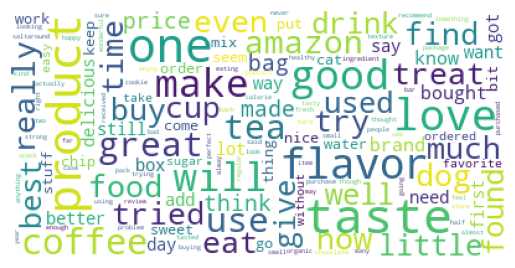

In [30]:
#plotting the word cloud
import wordcloud
all_text = ' '.join(txt for txt in df['Text'])
wordcld = wordcloud.WordCloud(max_words=150, max_font_size=40,background_color='white').generate(all_text)
plt.imshow(wordcld)
plt.axis('off')

### Removing the stopwords

In [31]:
from stop_words import get_stop_words

In [32]:
stwrd = get_stop_words('en')

In [33]:
def remove_stpwrd(text):
    wrds = text.split()
    new_text = [w for w in wrds if w not in stwrd]
    new_text = ' '.join(new_text)
    return new_text

In [34]:
df['Text'] = df['Text'].apply(lambda txt: remove_stpwrd(txt))
df['Summary'] = df['Summary'].apply(lambda txt: remove_stpwrd(txt))

In [35]:
df.head()

,Summary,Text,Sentiments,Usefullness
0,good quality dog food,bought several vitality canned dog food produc...,positive,usefull
1,advertised,product arrived labeled jumbo salted peanuts p...,negative,notusefull
2,delight says,confection around centuries light pillowy citr...,positive,usefull
3,cough medicine,looking secret ingredient robitussin believe f...,negative,usefull
4,great taffy,great taffy great price wide assortment yummy ...,positive,notusefull


(-0.5, 399.5, 199.5, -0.5)

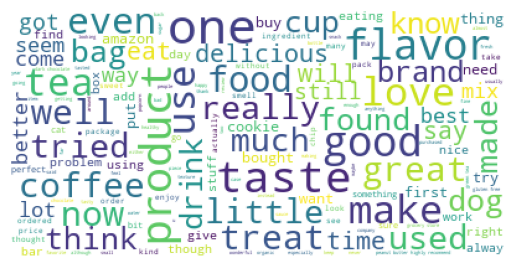

In [36]:
#plotting wordcloud after removing stopwords
all_text = ' '.join(txt for txt in df['Text'])
wrdcld = wordcloud.WordCloud(max_font_size=40, max_words=150,background_color='white').generate(all_text)
plt.imshow(wrdcld)
plt.axis('off')

### Stemming the words

In [37]:
from nltk.stem import SnowballStemmer

In [38]:
stem = SnowballStemmer(language='english')

In [39]:
def stemmimg(text):
    wrds = text.split()
    new_text = [stem.stem(w) for w in wrds]
    new_text = ' '.join(new_text)
    return new_text

In [40]:
df['Text'] = df['Text'].apply(lambda txt: stemmimg(txt))
df['Summary'] = df['Summary'].apply(lambda txt: stemmimg(txt))

In [41]:
df.head()

,Summary,Text,Sentiments,Usefullness
0,good qualiti dog food,bought sever vital can dog food product found ...,positive,usefull
1,advertis,product arriv label jumbo salt peanut peanut a...,negative,notusefull
2,delight say,confect around centuri light pillowi citrus ge...,positive,usefull
3,cough medicin,look secret ingredi robitussin believ found go...,negative,usefull
4,great taffi,great taffi great price wide assort yummi taff...,positive,notusefull


### Vectorization using BOW

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [43]:
cv = CountVectorizer(max_features=7000)
vectors = cv.fit_transform(df.loc[:49999,'Text']).toarray()

In [44]:
y = df.loc[:49999,'Sentiments']

In [45]:
#Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(vectors, y, train_size=0.8, random_state=1)

### Model Building

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [48]:
#Training accuracy
model.score(x_train, y_train)

0.8705620562056205

In [49]:
#Testing Accuracy
y_test_pred = model.predict(x_test)
model.score(x_test,y_test)

0.8523852385238524

In [50]:
from sklearn.metrics import classification_report

In [51]:
#Classification report for test set
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

    negative       0.67      0.70      0.68      2272
    positive       0.91      0.90      0.90      7727

    accuracy                           0.85      9999
   macro avg       0.79      0.80      0.79      9999
weighted avg       0.85      0.85      0.85      9999



We acheive an accuracy of 85% and macro f1 score of 79%. Now lets try TFIDF.

In [55]:
#Save the model
import pickle
filename = 'trained_model.pkl'
pickle.dump(model,open(filename,'wb'))

### Vectorization using TFIDF

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tf = TfidfVectorizer(max_features=7000)

In [43]:
x = tf.fit_transform(df['Text']).toarray()
y = df['Sentiments']

In [45]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

### Model Building

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
model2 = MultinomialNB()
model2.fit(x_train,y_train)

MultinomialNB()

In [48]:
#Training accuracy
model2.score(x_train,y_train)

0.8292579257925793

In [49]:
#Testing accuracy
y_test_pred = model2.predict(x_test)
model2.score(x_test,y_test)

0.8132813281328133

In [50]:
from sklearn.metrics import classification_report

In [51]:
#Classification report for test set
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

    negative       0.25      0.88      0.39       663
    positive       0.99      0.81      0.89      9336

    accuracy                           0.81      9999
   macro avg       0.62      0.85      0.64      9999
weighted avg       0.94      0.81      0.86      9999



We can see that BOW performs better than TFIDF model. So we can go ahead with BOW model.